In [4]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast
import seaborn as sns

dataset=load_dataset('lukebarousse/data_jobs')
df=dataset['train'].to_pandas()

df.job_posted_date=pd.to_datetime(df.job_posted_date)
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x )

In [5]:
df_analyst = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_explode = df_analyst.explode('job_skills').copy()

df_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)
df_stats = df_stats.sort_values('skill_count', ascending=False).head(10)


In [7]:
DA_job_count = len(df_analyst)
df_stats['skill_percent'] = df_stats['skill_count']/DA_job_count *100
df_stats

,skill_count,median_salary,skill_percent
job_skills,,,
sql,34452,91000.00,50.802171
excel,27519,84392.00,40.578919
tableau,19311,92875.00,28.475581
python,18382,97500.00,27.105698
sas,13200,90000.00,19.464433
r,11659,92500.00,17.192108
power bi,11630,90000.00,17.149345
word,7611,81194.75,11.223015
powerpoint,7175,85000.00,10.580099


<Axes: xlabel='skill_percent', ylabel='median_salary'>

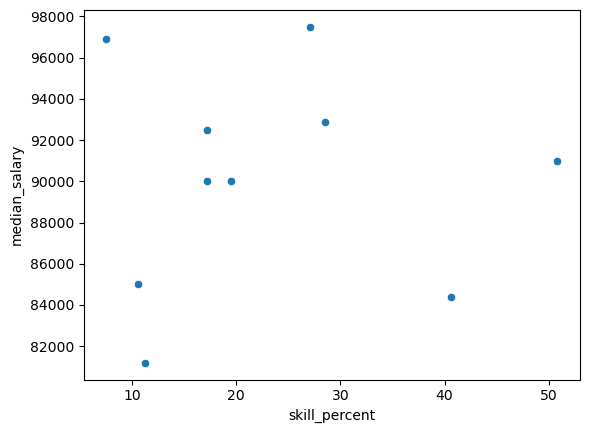

In [8]:
sns.scatterplot(data=df_stats, x='skill_percent', y='median_salary')

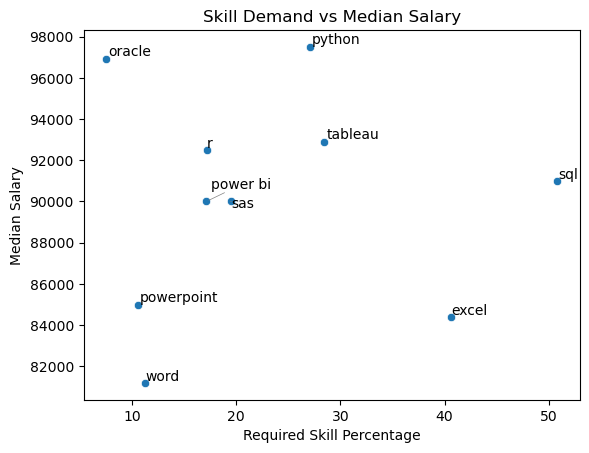

In [13]:
from adjustText import adjust_text

sns.scatterplot(data=df_stats, x='skill_percent', y='median_salary')
ax = plt.gca()

texts = []
for skill, row in df_stats.iterrows():
    texts.append( ax.text(row['skill_percent'], row['median_salary'], skill))

adjust_text( texts, arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))

plt.xlabel('Required Skill Percentage')
plt.ylabel('Median Salary')
plt.title('Skill Demand vs Median Salary')
plt.show()
